# Use Python to find useful insights from data scrapped from a site

## Importing necessary libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from bs4 import BeautifulSoup as bs
from urllib.request import urlopen 

url='http://www.hubertiming.com/results/2017GPTR10K'
html= urlopen(url)
soup=bs(html,'lxml')
type(soup)

bs4.BeautifulSoup

Gettting basic information from the data

In [2]:
print(soup.title)
print(soup.get_text())

<title>2017 Intel Great Place to Run 10K \ Urban Clash Games Race Results</title>







2017 Intel Great Place to Run 10K \ Urban Clash Games Race Results





        @media print {
            .noprint {
                display: none;
            }

            .dataTables_filter {
                display: none;
            }
        }

        #individualResults tbody tr {
            cursor: pointer;
        }

        .video-container {
            position: relative;
            padding-bottom: 56.25%; /* 16:9 */
            padding-top: 25px;
            height: 0;
        }

            .video-container iframe {
                position: absolute;
                top: 0;
                left: 0;
                width: 100%;
                height: 100%;
            }

        .dataTables_wrapper .dataTables_paginate {
            float: right;
            text-align: right;
            padding-top: 0.25em;
        }

            .dataTables_wrapper .dataTables_paginate .pagina

#### Printing all the <tr> tags from the html 

In [3]:
rows=soup.find_all('tr')
print(rows[:10])

[<tr><td>Finishers:</td><td>577</td></tr>, <tr><td>Male:</td><td>414</td></tr>, <tr><td>Female:</td><td>163</td></tr>, <tr class="header">
<th>Place</th>
<th>Bib</th>
<th>Name</th>
<th>Gender</th>
<th>City</th>
<th>State</th>
<th>Chip Time</th>
<th>Chip Pace</th>
<th>Gender Place</th>
<th>Age Group</th>
<th>Age Group Place</th>
<th>Time to Start</th>
<th>Gun Time</th>
<th>Team</th>
</tr>, <tr>
<td>1</td>
<td>814</td>
<td>JARED WILSON</td>
<td>M</td>
<td>TIGARD</td>
<td>OR</td>
<td>36:21</td>
<td>5:51</td>
<td>1 of 414</td>
<td>M 36-45</td>
<td>1 of 152</td>
<td>0:03</td>
<td>36:24</td>
<td></td>
</tr>, <tr>
<td>2</td>
<td>573</td>
<td>NATHAN A SUSTERSIC</td>
<td>M</td>
<td>PORTLAND</td>
<td>OR</td>
<td>36:42</td>
<td>5:55</td>
<td>2 of 414</td>
<td>M 26-35</td>
<td>1 of 154</td>
<td>0:03</td>
<td>36:45</td>
<td>INTEL TEAM F</td>
</tr>, <tr>
<td>3</td>
<td>687</td>
<td>FRANCISCO MAYA</td>
<td>M</td>
<td>PORTLAND</td>
<td>OR</td>
<td>37:44</td>
<td>6:05</td>
<td>3 of 414</td>
<td>M 46-55

In [4]:
list_rows=[]
for row in rows:
    row_td=row.find_all('td')
    str_cell=str(row_td)
    cleantext=bs(str_cell,'lxml').get_text()
    list_rows.append(cleantext)
print(list_rows)

['[Finishers:, 577]', '[Male:, 414]', '[Female:, 163]', '[]', '[1, 814, JARED WILSON, M, TIGARD, OR, 36:21, 5:51, 1 of 414, M 36-45, 1 of 152, 0:03, 36:24, ]', '[2, 573, NATHAN A SUSTERSIC, M, PORTLAND, OR, 36:42, 5:55, 2 of 414, M 26-35, 1 of 154, 0:03, 36:45, INTEL TEAM F]', '[3, 687, FRANCISCO MAYA, M, PORTLAND, OR, 37:44, 6:05, 3 of 414, M 46-55, 1 of 64, 0:04, 37:48, ]', '[4, 623, PAUL MORROW, M, BEAVERTON, OR, 38:34, 6:13, 4 of 414, M 36-45, 2 of 152, 0:03, 38:37, ]', '[5, 569, DEREK G OSBORNE, M, HILLSBORO, OR, 39:21, 6:20, 5 of 414, M 26-35, 2 of 154, 0:03, 39:24, INTEL TEAM F]', '[6, 642, JONATHON TRAN, M, PORTLAND, OR, 39:49, 6:25, 6 of 414, M 18-25, 1 of 34, 0:06, 39:55, ]', '[7, 144, GEORGE TOTONCHY, M, PORTLAND, OR, 40:04, 6:27, 7 of 414, M 36-45, 3 of 152, 0:13, 40:17, ]', '[8, 395, BENJAMIN C CHAFFIN, M, PORTLAND, OR, 40:05, 6:27, 8 of 414, M 36-45, 4 of 152, 0:04, 40:09, ]', '[9, 7, BRANDON THOMAS, M, , , 40:17, 6:29, 9 of 414, M 26-35, 3 of 154, 0:07, 40:24, COLUMBIA T

#### Converting rows in Data Frame using pandas

In [5]:
df=pd.DataFrame(list_rows)
df.head(10)

,0
0,"[Finishers:, 577]"
1,"[Male:, 414]"
2,"[Female:, 163]"
3,[]
4,"[1, 814, JARED WILSON, M, TIGARD, OR, 36:21, 5..."
5,"[2, 573, NATHAN A SUSTERSIC, M, PORTLAND, OR, ..."
6,"[3, 687, FRANCISCO MAYA, M, PORTLAND, OR, 37:4..."
7,"[4, 623, PAUL MORROW, M, BEAVERTON, OR, 38:34,..."
8,"[5, 569, DEREK G OSBORNE, M, HILLSBORO, OR, 39..."
9,"[6, 642, JONATHON TRAN, M, PORTLAND, OR, 39:49..."


#### Data Cleaning

In [6]:
df1=df[0].str.split(',',expand=True)
df1.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,[Finishers:,577],None,None,None,None,None,None,None,None,None,None,None,None
1,[Male:,414],None,None,None,None,None,None,None,None,None,None,None,None
2,[Female:,163],None,None,None,None,None,None,None,None,None,None,None,None
3,[],None,None,None,None,None,None,None,None,None,None,None,None,None
4,[1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,1 of 414,M 36-45,1 of 152,0:03,36:24,]
5,[2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,2 of 414,M 26-35,1 of 154,0:03,36:45,INTEL TEAM F]
6,[3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,3 of 414,M 46-55,1 of 64,0:04,37:48,]
7,[4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,4 of 414,M 36-45,2 of 152,0:03,38:37,]
8,[5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,6:20,5 of 414,M 26-35,2 of 154,0:03,39:24,INTEL TEAM F]
9,[6,642,JONATHON TRAN,M,PORTLAND,OR,39:49,6:25,6 of 414,M 18-25,1 of 34,0:06,39:55,]


In [7]:
df1[0] =df1[0].str.strip('[]')
df1[13] =df1[13].str.strip(']')
df1.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Finishers:,577],None,None,None,None,None,None,None,None,None,None,None,None
1,Male:,414],None,None,None,None,None,None,None,None,None,None,None,None
2,Female:,163],None,None,None,None,None,None,None,None,None,None,None,None
3,,None,None,None,None,None,None,None,None,None,None,None,None,None
4,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,1 of 414,M 36-45,1 of 152,0:03,36:24,
5,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,2 of 414,M 26-35,1 of 154,0:03,36:45,INTEL TEAM F
6,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,3 of 414,M 46-55,1 of 64,0:04,37:48,
7,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,4 of 414,M 36-45,2 of 152,0:03,38:37,
8,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,6:20,5 of 414,M 26-35,2 of 154,0:03,39:24,INTEL TEAM F
9,6,642,JONATHON TRAN,M,PORTLAND,OR,39:49,6:25,6 of 414,M 18-25,1 of 34,0:06,39:55,


In [8]:
cols_labels=soup.find_all('th')
cols_labels

[<th>Place</th>,
 <th>Bib</th>,
 <th>Name</th>,
 <th>Gender</th>,
 <th>City</th>,
 <th>State</th>,
 <th>Chip Time</th>,
 <th>Chip Pace</th>,
 <th>Gender Place</th>,
 <th>Age Group</th>,
 <th>Age Group Place</th>,
 <th>Time to Start</th>,
 <th>Gun Time</th>,
 <th>Team</th>]

In [9]:
all_header=[]
cols_head=str(cols_labels)
cleantext2=bs(cols_head,'lxml').get_text()
all_header.append(cleantext2)
all_header

['[Place, Bib, Name, Gender, City, State, Chip Time, Chip Pace, Gender Place, Age Group, Age Group Place, Time to Start, Gun Time, Team]']

In [10]:
df_head=pd.DataFrame(all_header)[0].str.split(',', expand=True)
print(df_head)

       0     1      2        3      4       5           6           7   \
0  [Place   Bib   Name   Gender   City   State   Chip Time   Chip Pace   

              8           9                 10              11         12  \
0   Gender Place   Age Group   Age Group Place   Time to Start   Gun Time   

       13  
0   Team]  


In [11]:
frames=(df_head, df1)

df2=pd.concat(frames)
df2.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]
0,Finishers:,577],None,None,None,None,None,None,None,None,None,None,None,None
1,Male:,414],None,None,None,None,None,None,None,None,None,None,None,None
2,Female:,163],None,None,None,None,None,None,None,None,None,None,None,None
3,,None,None,None,None,None,None,None,None,None,None,None,None,None
4,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,1 of 414,M 36-45,1 of 152,0:03,36:24,
5,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,2 of 414,M 26-35,1 of 154,0:03,36:45,INTEL TEAM F
6,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,3 of 414,M 46-55,1 of 64,0:04,37:48,
7,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,4 of 414,M 36-45,2 of 152,0:03,38:37,
8,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,6:20,5 of 414,M 26-35,2 of 154,0:03,39:24,INTEL TEAM F


In [12]:
df3=df2.rename(columns=df2.iloc[0])
df3=df3.drop(df3.index[0])
df3=df3.dropna(axis=0, how="any")
df3.info()
df3.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577 entries, 4 to 580
Data columns (total 14 columns):
[Place              577 non-null object
 Bib                577 non-null object
 Name               577 non-null object
 Gender             577 non-null object
 City               577 non-null object
 State              577 non-null object
 Chip Time          577 non-null object
 Chip Pace          577 non-null object
 Gender Place       577 non-null object
 Age Group          577 non-null object
 Age Group Place    577 non-null object
 Time to Start      577 non-null object
 Gun Time           577 non-null object
 Team]              577 non-null object
dtypes: object(14)
memory usage: 67.6+ KB


,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]
4,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,1 of 414,M 36-45,1 of 152,0:03,36:24,
5,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,2 of 414,M 26-35,1 of 154,0:03,36:45,INTEL TEAM F
6,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,3 of 414,M 46-55,1 of 64,0:04,37:48,
7,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,4 of 414,M 36-45,2 of 152,0:03,38:37,
8,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,6:20,5 of 414,M 26-35,2 of 154,0:03,39:24,INTEL TEAM F


In [19]:
df3.rename(columns={'[Place':'Place'}, inplace=True)
df3.rename(columns={' Team]':'Team'}, inplace=True)
df3.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team
4,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,1 of 414,M 36-45,1 of 152,0:03,36:24,
5,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,2 of 414,M 26-35,1 of 154,0:03,36:45,INTEL TEAM F
6,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,3 of 414,M 46-55,1 of 64,0:04,37:48,
7,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,4 of 414,M 36-45,2 of 152,0:03,38:37,
8,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,6:20,5 of 414,M 26-35,2 of 154,0:03,39:24,INTEL TEAM F


#### Q1: The average completion time in minutes?

In [37]:
time_list=df3[' Chip Time'].tolist()

time_minutes=[]
for time in time_list:
    l = time.split(':')
    if len(l)==2:
        m,s=l
        math=(int(m)+int(s)/60)
        time_minutes.append(math)
    elif len(l)==3:
        h,m,s=l
        math=(int(h)*60+int(m)+int(s)/60)
        time_minutes.append(math)

df3['Runner Minutes']=time_minutes
df3.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team,Runner Minutes
4,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,1 of 414,M 36-45,1 of 152,0:03,36:24,,36.350000
5,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,2 of 414,M 26-35,1 of 154,0:03,36:45,INTEL TEAM F,36.700000
6,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,3 of 414,M 46-55,1 of 64,0:04,37:48,,37.733333
7,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,4 of 414,M 36-45,2 of 152,0:03,38:37,,38.566667
8,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,6:20,5 of 414,M 26-35,2 of 154,0:03,39:24,INTEL TEAM F,39.350000


In [38]:
print(df3['Runner Minutes'].mean())

60.035932986712865


#### Q2: Is the data following Normal distribution?

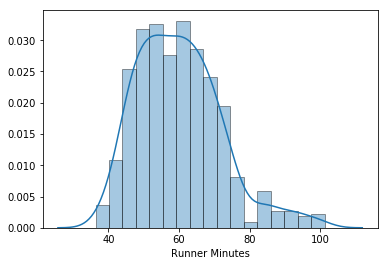

In [78]:
x=df3['Runner Minutes']
ax=sns.distplot(x,hist=True,kde=True, rug=False, hist_kws={'edgecolor':'black'})
plt.show()

#### Q3: Is there a difference between female and male performance?

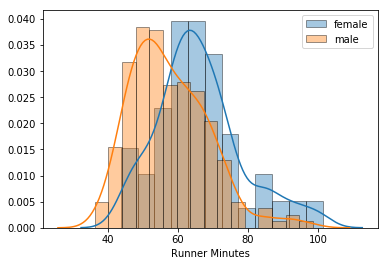

In [74]:
f_per=df3.loc[df3[' Gender']==' F']['Runner Minutes']
m_per=df3.loc[df3[' Gender']==' M']['Runner Minutes']

sns.distplot(f_per,hist=True,hist_kws={'edgecolor':'black'}, label='female')
sns.distplot(m_per,hist=True,hist_kws={'edgecolor':'black'}, label='male')
plt.legend()

Grouping by the data as per Gender column

In [76]:
gender_stats=df3.groupby(' Gender', as_index=True).describe()
print(gender_stats)

        Runner Minutes                                                         \
                 count       mean        std        min        25%        50%   
 Gender                                                                         
 F               163.0  66.119223  12.184440  43.766667  58.758333  64.616667   
 M               414.0  57.640821  11.011857  36.350000  49.395833  55.791667   

                                
               75%         max  
 Gender                         
 F       72.058333  101.300000  
 M       64.804167   98.516667  
